### Import Packages

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Fetch the data

In [247]:
data = pd.read_csv(r"D:\Project4\indian_liver_patient.csv")
data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### To check null values

In [251]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

### Handling missing data

In [253]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

### New data

In [255]:
new_data = data
new_data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Label encoding

In [257]:
# new_data['Gender'] = np.where(new_data['Gender']=='Male', 1,0)
# new_data['Dataset'] = np.where(new_data['Dataset']=='1', 0,1)
# new_data.shape

le = LabelEncoder()
new_data['Gender'] = le.fit_transform(new_data['Gender'])
new_data['Dataset'] = le.fit_transform(new_data['Dataset'])
    
#new_data

### Outlier Check

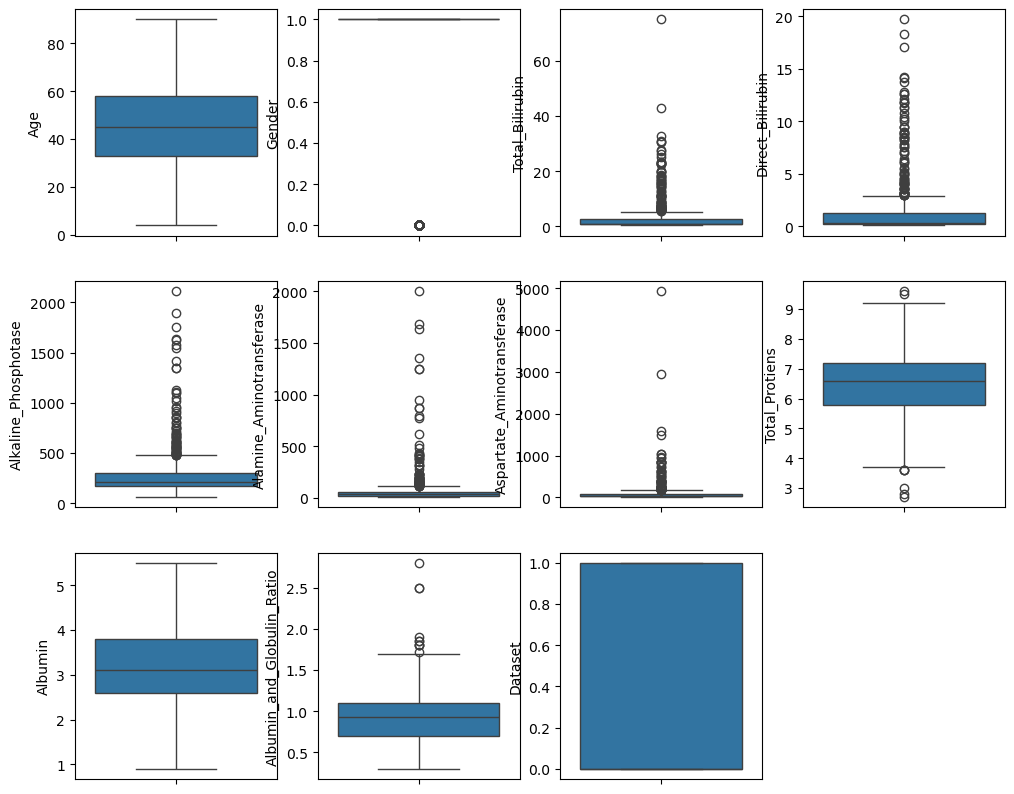

<Figure size 640x480 with 0 Axes>

In [259]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,10))
axes = axes.flatten()

for ax, col in zip(axes,new_data.columns):
    sns.boxplot(new_data[col], ax=ax)

for ax in axes[len(new_data.columns):]:
    ax.set_visible(False)

plt.show()
plt.tight_layout()

### Outlier features

In [261]:
outlier_cols = []

for col in new_data.columns:
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # check if any values are outside bounds
    if ((new_data[col] < lower) | (new_data[col] > upper)).any():
        outlier_cols.append(col)

outlier_cols

['Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin_and_Globulin_Ratio']

### Handling Outliers - log, log2, log10, inverse, sqrt Transformation

In [263]:
new_data['Total_Bilirubin'] = np.log2(new_data['Albumin_and_Globulin_Ratio'])
new_data['Direct_Bilirubin'] = np.log2(new_data['Direct_Bilirubin'])
new_data['Total_Protiens'] = np.log2(new_data['Total_Protiens'])
new_data['Aspartate_Aminotransferase'] = np.log10(new_data['Aspartate_Aminotransferase'])
new_data['Albumin_and_Globulin_Ratio'] = np.log(new_data['Albumin_and_Globulin_Ratio'])
new_data['Alamine_Aminotransferase'] = np.sqrt(new_data['Alamine_Aminotransferase'])
new_data['Alkaline_Phosphotase'] =  1/new_data['Alkaline_Phosphotase']
new_data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,-0.152003,-3.321928,0.005348,4.000000,1.255273,2.765535,3.3,-0.105361,0
1,62,1,-0.434403,2.459432,0.001431,8.000000,2.000000,2.906891,3.2,-0.301105,0
2,62,1,-0.168123,2.035624,0.002041,7.745967,1.832509,2.807355,3.3,-0.116534,0
3,58,1,0.000000,-1.321928,0.005495,3.741657,1.301030,2.765535,3.4,0.000000,0
4,72,1,-1.321928,1.000000,0.005128,5.196152,1.770852,2.867896,2.4,-0.916291,0


### Features and Target

In [265]:
X = new_data.drop(['Dataset'], axis=1)
y = new_data['Dataset']

### SMOTE Technique

In [267]:
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

### Split Test and Train

In [269]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

### Logistc Regression CV

In [239]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=99))
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
grid.fit(X_train, y_train)

# Best model
best_logreg = grid.best_estimator_

# Predictions
y_pred = best_logreg.predict(X_test)
y_pred_prob = best_logreg.predict_proba(X_test)[:, 1]

# Metrics
accuracy_LR  = accuracy_score(y_test, y_pred)
precision_LR = precision_score(y_test, y_pred)
recall_LR    = recall_score(y_test, y_pred)
f1_LR        = f1_score(y_test, y_pred)
roc_auc_LR   = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy      : {accuracy_LR:.4f}")
print(f"Precision     : {precision_LR:.4f}")
print(f"Recall        : {recall_LR:.4f}")
print(f"F1 Score      : {f1_LR:.4f}")
print(f"AUC-ROC Score : {roc_auc_LR:.4f}")
print(classification_report(y_test, y_pred))

Accuracy      : 0.7395
Precision     : 0.6786
Recall        : 0.8482
F1 Score      : 0.7540
AUC-ROC Score : 0.8036
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       126
           1       0.68      0.85      0.75       112

    accuracy                           0.74       238
   macro avg       0.75      0.75      0.74       238
weighted avg       0.76      0.74      0.74       238



### Random Forest CV

In [184]:
from sklearn.model_selection import GridSearchCV
# Pipeline
rf_cv = Pipeline(steps=[
    ('rf', RandomForestClassifier(random_state=99))
])

# Parameter grid (CV happens here)
param_grid = {
    'rf__n_estimators': [200, 300, 400],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# GridSearchCV (Cross-Validation)
rf_cv = GridSearchCV(
    rf_cv,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
rf_cv.fit(X_train, y_train)

# Predictions
y_pred = rf_cv.predict(X_test)
y_pred_prob = rf_cv.predict_proba(X_test)[:, 1]

# Metrics
accuracy_RF  = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred)
recall_RF    = recall_score(y_test, y_pred)
f1_RF        = f1_score(y_test, y_pred)
roc_auc_RF   = roc_auc_score(y_test, y_pred_prob)

# Results
print("Best Parameters:", rf_cv.best_params_)
print(f"Accuracy      : {accuracy_RF:.4f}")
print(f"Precision     : {precision_RF:.4f}")
print(f"Recall        : {recall_RF:.4f}")
print(f"F1 Score      : {f1_RF:.4f}")
print(f"AUC-ROC Score : {roc_auc_RF:.4f}")

print(classification_report(y_test, y_pred))

Best Parameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Accuracy      : 0.8277
Precision     : 0.7554
Recall        : 0.9375
F1 Score      : 0.8367
AUC-ROC Score : 0.9144
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       126
           1       0.76      0.94      0.84       112

    accuracy                           0.83       238
   macro avg       0.84      0.83      0.83       238
weighted avg       0.85      0.83      0.83       238



### Gradient Boosting CV

In [186]:
# Pipeline
gb_cv = Pipeline(steps=[
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Parameter grid (CV happens here)
param_grid = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.05, 0.1],
    'gb__max_depth': [3, 5, 7],
    'gb__min_samples_split': [2, 5],
    'gb__min_samples_leaf': [1, 2]
}

# GridSearchCV (Cross-Validation)
gb_cv = GridSearchCV(
    gb_cv,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
gb_cv.fit(X_train, y_train)

# Predictions
y_pred = gb_cv.predict(X_test)
y_pred_prob = gb_cv.predict_proba(X_test)[:, 1]

# Metrics
accuracy_GB  = accuracy_score(y_test, y_pred)
precision_GB = precision_score(y_test, y_pred)
recall_GB    = recall_score(y_test, y_pred)
f1_GB        = f1_score(y_test, y_pred)
roc_auc_GB   = roc_auc_score(y_test, y_pred_prob)

# Results
print("Best Parameters:", gb_cv.best_params_)
print(f"Accuracy      : {accuracy_GB:.4f}")
print(f"Precision     : {precision_GB:.4f}")
print(f"Recall        : {recall_GB:.4f}")
print(f"F1 Score      : {f1_GB:.4f}")
print(f"AUC-ROC Score : {roc_auc_GB:.4f}")

print(classification_report(y_test, y_pred))

Best Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 7, 'gb__min_samples_leaf': 2, 'gb__min_samples_split': 5, 'gb__n_estimators': 200}
Accuracy      : 0.8193
Precision     : 0.7717
Recall        : 0.8750
F1 Score      : 0.8201
AUC-ROC Score : 0.9216
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       126
           1       0.77      0.88      0.82       112

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.83      0.82      0.82       238



### XG Boosting CV

In [283]:
# Pipeline
xgb_cv = Pipeline(steps=[
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        random_state=33
    ))
])

# Parameter grid (CV happens here)
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# GridSearchCV (Cross-Validation)
xgb_cv = GridSearchCV(
    xgb_cv,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
xgb_cv.fit(X_train, y_train)

# Predictions
y_pred = xgb_cv.predict(X_test)
y_pred_prob = xgb_cv.predict_proba(X_test)[:, 1]

# Metrics
accuracy_XGB  = accuracy_score(y_test, y_pred)
precision_XGB = precision_score(y_test, y_pred)
recall_XGB    = recall_score(y_test, y_pred)
f1_XGB        = f1_score(y_test, y_pred)
roc_auc_XGB   = roc_auc_score(y_test, y_pred_prob)

# Results
print("Best Parameters:", xgb_cv.best_params_)
print(f"Accuracy      : {accuracy_XGB:.4f}")
print(f"Precision     : {precision_XGB:.4f}")
print(f"Recall        : {recall_XGB:.4f}")
print(f"F1 Score      : {f1_XGB:.4f}")
print(f"AUC-ROC Score : {roc_auc_XGB:.4f}")

print(classification_report(y_test, y_pred))

Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0}
Accuracy      : 0.8117
Precision     : 0.7440
Recall        : 0.8774
F1 Score      : 0.8052
AUC-ROC Score : 0.9014
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       133
           1       0.74      0.88      0.81       106

    accuracy                           0.81       239
   macro avg       0.81      0.82      0.81       239
weighted avg       0.82      0.81      0.81       239



### Ada Boosting CV

In [190]:
# Pipeline
ada_cv = Pipeline(steps=[
    ('ada', AdaBoostClassifier(random_state=123))
])

# Parameter grid (CV happens here)
param_grid = {
    'ada__n_estimators': [50, 100, 200, 300],
    'ada__learning_rate': [0.01, 0.05, 0.1, 1.0]
}

# GridSearchCV (Cross-Validation)
ada_cv = GridSearchCV(
    ada_cv,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
ada_cv.fit(X_train, y_train)

# Predictions
y_pred = ada_cv.predict(X_test)
y_pred_prob = ada_cv.predict_proba(X_test)[:, 1]

# Metrics
accuracy_AB  = accuracy_score(y_test, y_pred)
precision_AB = precision_score(y_test, y_pred)
recall_AB    = recall_score(y_test, y_pred)
f1_AB        = f1_score(y_test, y_pred)
roc_auc_AB   = roc_auc_score(y_test, y_pred_prob)

# Results
print("Best Parameters:", ada_cv.best_params_)
print(f"Accuracy      : {accuracy_AB:.4f}")
print(f"Precision     : {precision_AB:.4f}")
print(f"Recall        : {recall_AB:.4f}")
print(f"F1 Score      : {f1_AB:.4f}")
print(f"AUC-ROC Score : {roc_auc_AB:.4f}")

print(classification_report(y_test, y_pred))

Best Parameters: {'ada__learning_rate': 1.0, 'ada__n_estimators': 50}
Accuracy      : 0.7731
Precision     : 0.7132
Recall        : 0.8661
F1 Score      : 0.7823
AUC-ROC Score : 0.8400
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       126
           1       0.71      0.87      0.78       112

    accuracy                           0.77       238
   macro avg       0.78      0.78      0.77       238
weighted avg       0.79      0.77      0.77       238



### KNN CV

In [192]:
# Pipeline (Scaler is REQUIRED for KNN)
knn_cv = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameter grid (CV happens here)
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# GridSearchCV (Cross-Validation)
knn_cv = GridSearchCV(
    knn_cv,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
knn_cv.fit(X_train, y_train)

# Predictions
y_pred = knn_cv.predict(X_test)
y_pred_prob = knn_cv.predict_proba(X_test)[:, 1]

# Metrics
accuracy_KNN  = accuracy_score(y_test, y_pred)
precision_KNN = precision_score(y_test, y_pred)
recall_KNN    = recall_score(y_test, y_pred)
f1_KNN        = f1_score(y_test, y_pred)
roc_auc_KNN   = roc_auc_score(y_test, y_pred_prob)

# Results
print("Best Parameters:", knn_cv.best_params_)
print(f"Accuracy      : {accuracy_KNN:.4f}")
print(f"Precision     : {precision_KNN:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1_KNN:.4f}")
print(f"AUC-ROC Score : {roc_auc_KNN:.4f}")

print(classification_report(y_test, y_pred))

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Accuracy      : 0.7689
Precision     : 0.6815
Recall        : 0.9018
F1 Score      : 0.7955
AUC-ROC Score : 0.8598
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       126
           1       0.68      0.96      0.80       112

    accuracy                           0.77       238
   macro avg       0.81      0.78      0.76       238
weighted avg       0.82      0.77      0.76       238



### SVM CV

In [194]:
# Pipeline (Scaler is REQUIRED for SVM)
svm_cv = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

# Parameter grid (CV happens here)
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

# GridSearchCV (Cross-Validation)
svm_cv = GridSearchCV(
    svm_cv,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
svm_cv.fit(X_train, y_train)

# Predictions
y_pred = svm_cv.predict(X_test)
y_pred_prob = svm_cv.predict_proba(X_test)[:, 1]

# Metrics
accuracy_SVM  = accuracy_score(y_test, y_pred)
precision_SVM = precision_score(y_test, y_pred)
recall_SVM    = recall_score(y_test, y_pred)
f1_SVM        = f1_score(y_test, y_pred)
roc_auc_SVM   = roc_auc_score(y_test, y_pred_prob)

# Results
print("Best Parameters:", svm_cv.best_params_)
print(f"Accuracy      : {accuracy_SVM:.4f}")
print(f"Precision     : {precision_SVM:.4f}")
print(f"Recall        : {recall_SVM:.4f}")
print(f"F1 Score      : {f1_SVM:.4f}")
print(f"AUC-ROC Score : {roc_auc_SVM:.4f}")

print(classification_report(y_test, y_pred))

Best Parameters: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Accuracy      : 0.7899
Precision     : 0.7214
Recall        : 0.9018
F1 Score      : 0.8016
AUC-ROC Score : 0.8639
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       126
           1       0.72      0.90      0.80       112

    accuracy                           0.79       238
   macro avg       0.80      0.80      0.79       238
weighted avg       0.81      0.79      0.79       238



### Decision Tree CV

In [201]:
# Pipeline
dt_cv = Pipeline(steps=[
    ('dt', DecisionTreeClassifier(random_state=123))
])

# Parameter grid (CV happens here)
param_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 5, 10, 15],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV (Cross-Validation)
dt_cv = GridSearchCV(
    dt_cv,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
dt_cv.fit(X_train, y_train)

# Predictions
y_pred = dt_cv.predict(X_test)
y_pred_prob = dt_cv.predict_proba(X_test)[:, 1]

# Metrics
accuracy_DT  = accuracy_score(y_test, y_pred)
precision_DT = precision_score(y_test, y_pred)
recall_DT    = recall_score(y_test, y_pred)
f1_DT        = f1_score(y_test, y_pred)
roc_auc_DT   = roc_auc_score(y_test, y_pred_prob)

# Results
print("Best Parameters:", dt_cv.best_params_)
print(f"Accuracy      : {accuracy_DT:.4f}")
print(f"Precision     : {precision_DT:.4f}")
print(f"Recall        : {recall_DT:.4f}")
print(f"F1 Score      : {f1_DT:.4f}")
print(f"AUC-ROC Score : {roc_auc_DT:.4f}")

print(classification_report(y_test, y_pred))

Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}
Accuracy      : 0.7647
Precision     : 0.7500
Recall        : 0.7500
F1 Score      : 0.7500
AUC-ROC Score : 0.7994
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       126
           1       0.75      0.75      0.75       112

    accuracy                           0.76       238
   macro avg       0.76      0.76      0.76       238
weighted avg       0.76      0.76      0.76       238



### Best Performance Model

In [205]:
perfdata = {
    "ML": [
        "Logistic Regression",
        "Random Forest",
        "Decision Tree",
        "KNN",
        "SVM",
        "Ada Boosting",
        "Gradient Boosting",
        "XG Boosting"
    ],
    "Accuracy": [accuracy_LR, accuracy_RF, accuracy_DT, accuracy_KNN, accuracy_SVM, accuracy_AB, accuracy_GB, accuracy_XGB],
    "Precision":[precision_LR, precision_RF, precision_DT, precision_KNN, precision_SVM, precision_AB, precision_GB, precision_XGB],
    "Recall":[recall_LR, recall_RF, recall_DT, recall_KNN, recall_SVM, recall_AB, recall_GB, recall_XGB],
    "F1":[f1_LR, f1_RF, f1_DT, f1_KNN, f1_SVM, f1_AB, f1_GB, f1_XGB],
    "AUC-ROC": [roc_auc_LR, roc_auc_RF, roc_auc_DT, roc_auc_KNN, roc_auc_SVM, roc_auc_AB, roc_auc_GB, roc_auc_XGB]
}

ML_Perf = pd.DataFrame(perfdata)
ML_Perf

,ML,Accuracy,Precision,Recall,F1,AUC-ROC
0,Logistic Regression,0.739496,0.678571,0.848214,0.753968,0.803571
1,Random Forest,0.827731,0.755396,0.937500,0.836653,0.914399
2,Decision Tree,0.764706,0.750000,0.750000,0.750000,0.799426
3,KNN,0.768908,0.681529,0.955357,0.795539,0.859836
4,SVM,0.789916,0.721429,0.901786,0.801587,0.863946
5,Ada Boosting,0.773109,0.713235,0.866071,0.782258,0.839959
6,Gradient Boosting,0.819328,0.771654,0.875000,0.820084,0.921627
7,XG Boosting,0.831933,0.785714,0.883929,0.831933,0.908872


### Pickle file

In [285]:
import pickle
filename = 'liver_model.pkl'
pickle.dump(xgb_cv.best_estimator_, open(filename, 'wb'))

### EDA

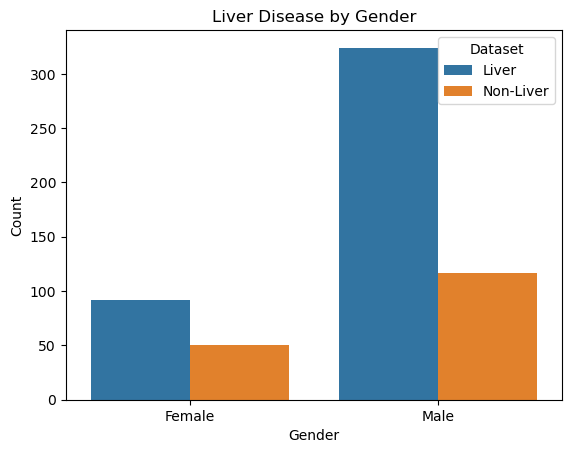

In [231]:
# Countplot by Gender
data['Gender_num'] = data['Gender'].map({0: 'Female', 1: 'Male'})
sns.countplot(x='Gender_num', hue='Dataset', data=data)
plt.title('Liver Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Dataset', labels=['Liver', 'Non-Liver'])
plt.show()

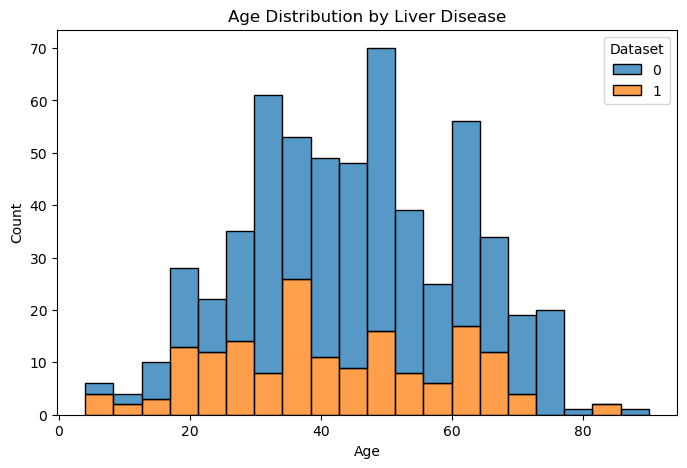

In [225]:
# Histogram of Age by target
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Age', hue='Dataset', multiple='stack', bins=20)
plt.title('Age Distribution by Liver Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

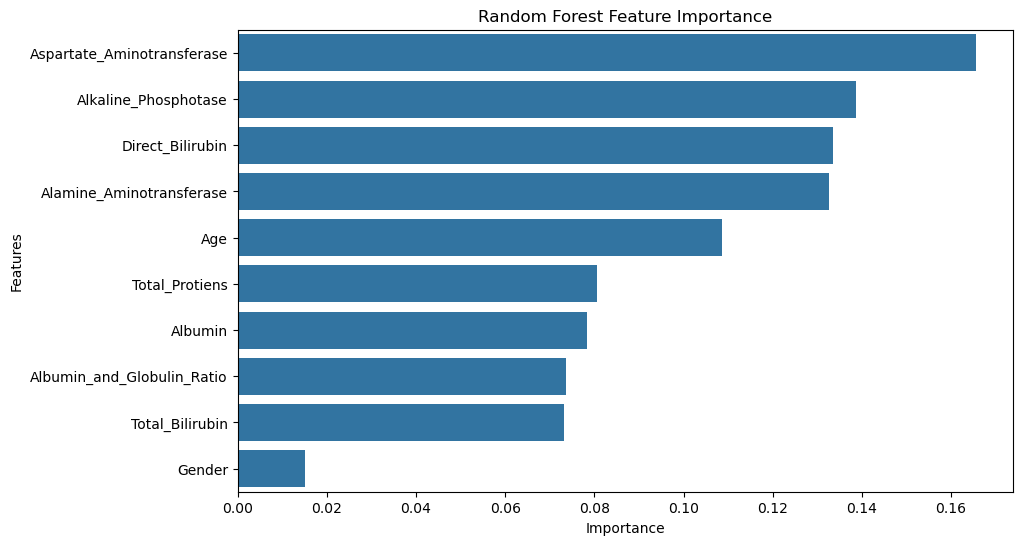

In [233]:
# Assuming 'best_rf' is your trained RandomForest model from GridSearchCV
best_rf = rf_cv.best_estimator_.named_steps['rf']  # Extract RF from pipeline

# Feature importance
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()